In [56]:
import pandas as pd
import matplotlib.pyplot as plt



### Tratamento dos dados

In [57]:
df = pd.read_csv('sales.csv')

# Ajusta o formato da data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Ajusta o formato dos valores de desemprego
df['Unemployment'] = df['Unemployment'] / 1000

df.head(10)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,1643690.90,0,42.31,2572.00,211.10,8.11
2010-02-12,1641957.44,1,38.51,2548.00,211.24,8.11
2010-02-19,1611968.17,0,39.93,2514.00,211.29,8.11
2010-02-26,1409727.59,0,46.63,2561.00,211.32,8.11
2010-03-05,1554806.68,0,46.50,2625.00,211.35,8.11
2010-03-12,1439541.59,0,57.79,2667.00,211.38,8.11
2010-03-19,1472515.79,0,54.58,2.72,211.22,8.11
2010-03-26,1404429.92,0,51.45,2732.00,211.02,8.11
2010-04-02,1594968.28,0,62.27,2719.00,210.82,7.81


In [58]:
# Ajusta o formato dos valores de combustível
df.loc[df['Fuel_Price'] > 10, 'Fuel_Price'] = df['Fuel_Price'] / 1000

df.head(10)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11
2010-03-12,1439541.59,0,57.79,2.67,211.38,8.11
2010-03-19,1472515.79,0,54.58,2.72,211.22,8.11
2010-03-26,1404429.92,0,51.45,2.73,211.02,8.11
2010-04-02,1594968.28,0,62.27,2.72,210.82,7.81


### Análise Exploratória dos Dados

#### Primeiras Impressões

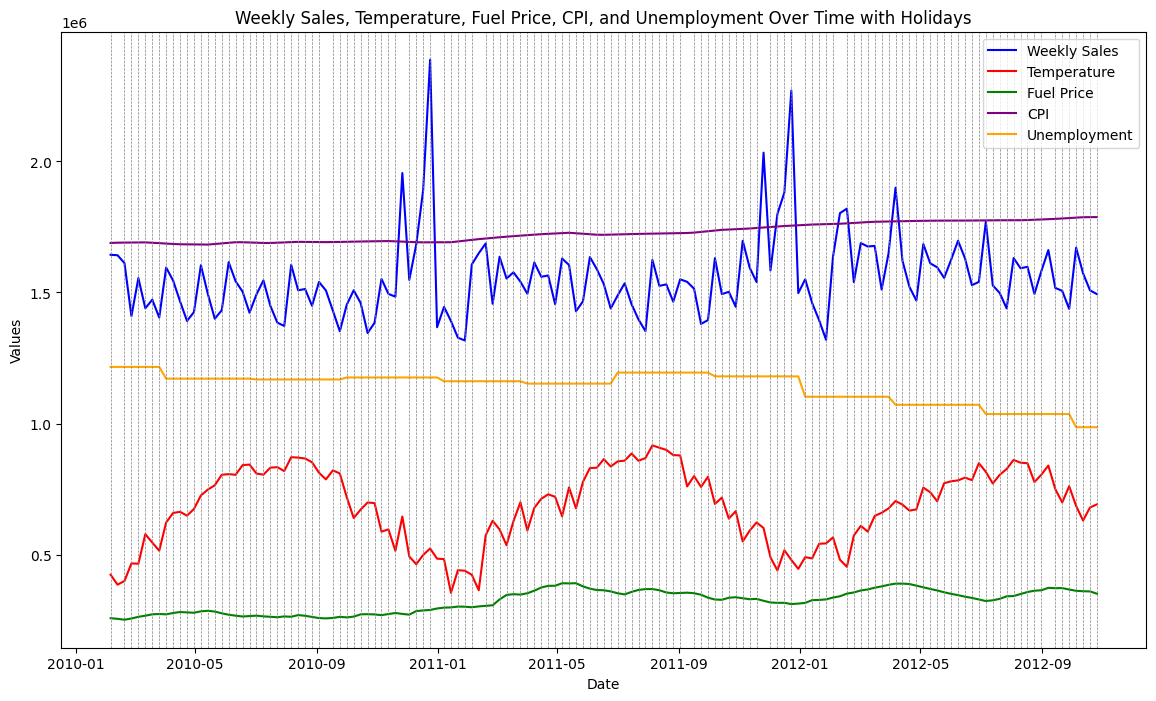

In [59]:
# Multiplicadores para ajustar a escala dos valores
multipliers = {
    'Weekly_Sales': 1,
    'Temperature': 10000,
    'Fuel_Price': 100000,
    'CPI': 8000,
    'Unemployment': 150000
}

plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Weekly_Sales'] * multipliers['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(df.index, df['Temperature'] * multipliers['Temperature'], label='Temperature', color='red')
plt.plot(df.index, df['Fuel_Price'] * multipliers['Fuel_Price'], label='Fuel Price', color='green')
plt.plot(df.index, df['CPI'] * multipliers['CPI'], label='CPI', color='purple')
plt.plot(df.index, df['Unemployment'] * multipliers['Unemployment'], label='Unemployment', color='orange')

for date, flag in zip(df.index, df['Holiday_Flag']):
    if flag == 0:
        plt.axvline(x=date, color='grey', linestyle='--', linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Weekly Sales, Temperature, Fuel Price, CPI, and Unemployment Over Time with Holidays')
plt.legend()

plt.show()

A primeira coisa a ser notada é que a presença ou ausência de feriados na semana não é uma informação relevante por si só, uma vez que tanto grandes picos quanto vales de venda, bem como valores intermediários, se encontram associados a estas semanas. Gera-se novo gráfico sem esta informação para uma visualização mais limpa.

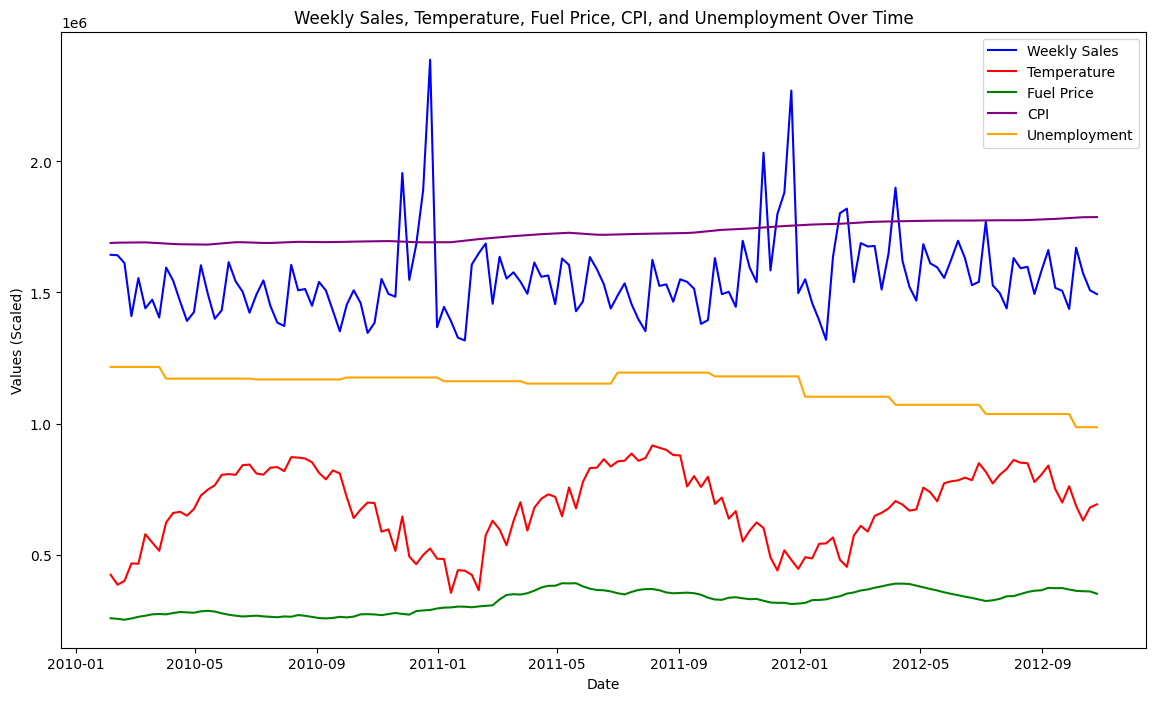

In [60]:
plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Weekly_Sales'] * multipliers['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(df.index, df['Temperature'] * multipliers['Temperature'], label='Temperature', color='red')
plt.plot(df.index, df['Fuel_Price'] * multipliers['Fuel_Price'], label='Fuel Price', color='green')
plt.plot(df.index, df['CPI'] * multipliers['CPI'], label='CPI', color='purple')
plt.plot(df.index, df['Unemployment'] * multipliers['Unemployment'], label='Unemployment', color='orange')

plt.xlabel('Date')
plt.ylabel('Values (Scaled)')
plt.title('Weekly Sales, Temperature, Fuel Price, CPI, and Unemployment Over Time')
plt.legend()

plt.show()

A próxima informação mais notável é a suposta correlação entre a queda de temperatura e uma forte oscilação positiva nas vendas. Porém, ao olhar mais atentamente, justamene quando as temperaturas ficam ainda mais baixas, antes de subirem novamente, as vendas despencam. Nota-se portanto que, na verdade, a queda da temperatura está correlacionada ao final do ano, e as festas de fim de ano, por sua vez, são o fenômeno por trás da alavancagem sazonal das vendas, que despencam em janeiro. Portanto exclui-se também a coluna da temperatura de análises futuras.

#### Análise da Média Móvel

Notando que as colunas restantes, candidatas a análises de correlação mais estritas, apresentam muito menos oscilações ao longo do calendário que as Vendas Semanais, faz-se útil extrair valores de média móvel desta para efeitos comparativos. 

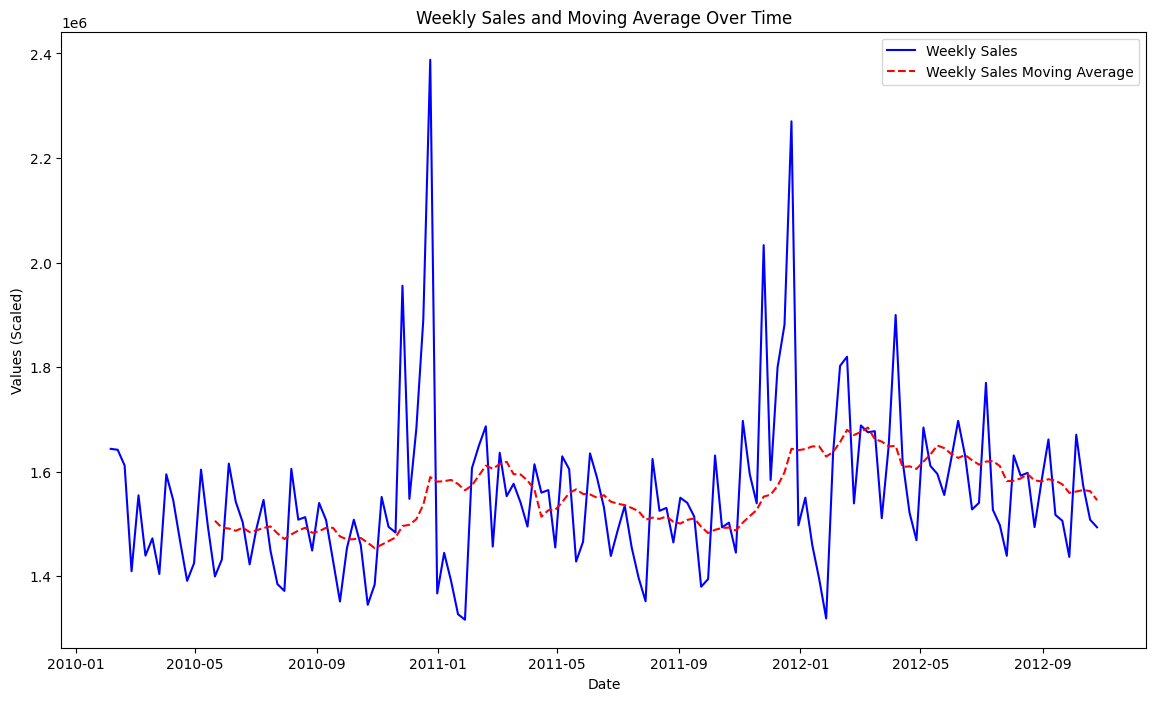

In [61]:
df['Weekly_Sales_MA'] = df['Weekly_Sales'].rolling(window=16).mean()

plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Weekly_Sales'] * multipliers['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(df.index, df['Weekly_Sales_MA'] * multipliers['Weekly_Sales'], label='Weekly Sales Moving Average', color='red', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Values (Scaled)')
plt.title('Weekly Sales and Moving Average Over Time')
plt.legend()

plt.show()

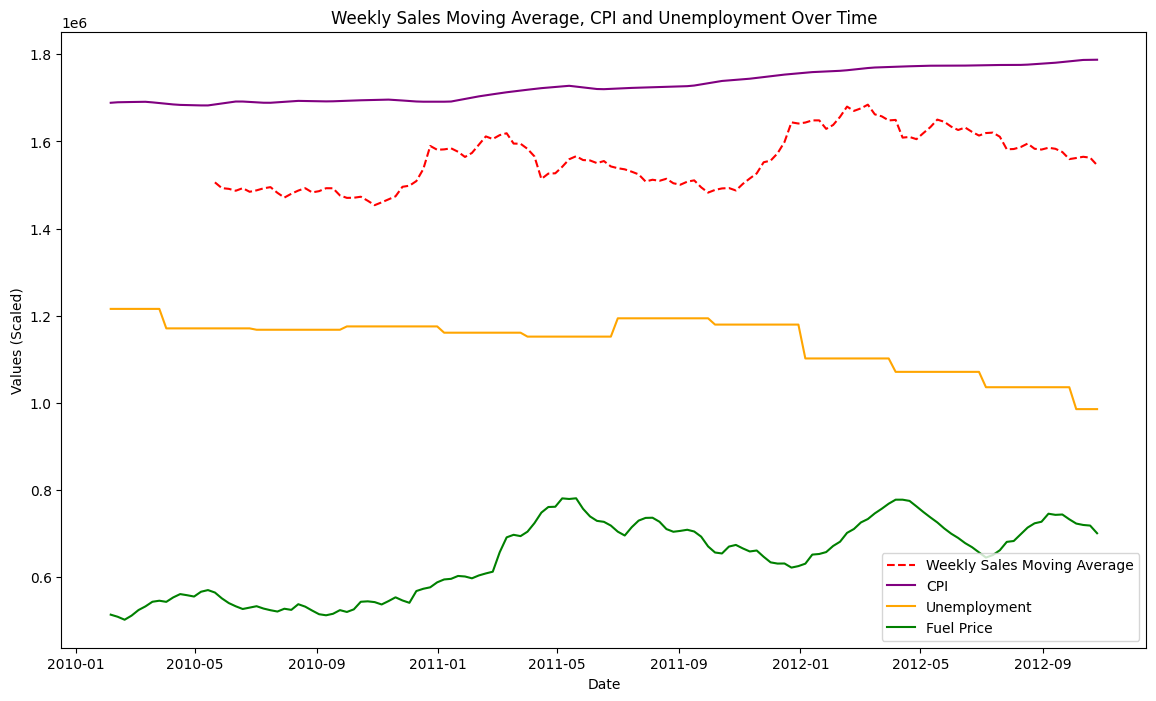

In [62]:
multipliers['Fuel_Price'] = 200000

plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Weekly_Sales_MA'] * multipliers['Weekly_Sales'], label='Weekly Sales Moving Average', color='red', linestyle='--')
plt.plot(df.index, df['CPI'] * multipliers['CPI'], label='CPI', color='purple')
plt.plot(df.index, df['Unemployment'] * multipliers['Unemployment'], label='Unemployment', color='orange')
plt.plot(df.index, df['Fuel_Price'] * multipliers['Fuel_Price'], label='Fuel Price', color='green')

plt.xlabel('Date')
plt.ylabel('Values (Scaled)')
plt.title('Weekly Sales Moving Average, CPI and Unemployment Over Time')
plt.legend()

plt.show()

Porfim, conclui-se que aparentemente as vendas são afetadas positivamente pelo aumento do CPI e do Fuel_Price (preço de combustível), e negativamente pelo aumento de do desemprego. Nesta próxima etapa serão verificadas quais dessas correlações são mais ou menos fortes.

#### Análise Diagnóstica

In [63]:
pd.options.display.float_format = '{:.2f}'.format


correlation_fuel_original = df['Weekly_Sales'].corr(df['Fuel_Price'])
correlation_fuel_ma = df['Weekly_Sales_MA'].corr(df['Fuel_Price'])
correlation_cpi_original = df['Weekly_Sales'].corr(df['CPI'])
correlation_cpi_ma = df['Weekly_Sales_MA'].corr(df['CPI'])
correlation_unemployment_original = df['Weekly_Sales'].corr(df['Unemployment'])
correlation_unemployment_ma = df['Weekly_Sales_MA'].corr(df['Unemployment'])

correlation_data = {
    'Correlation_Type': ['Original', 'Moving_Average'],
    'Fuel_Price': [correlation_fuel_original, correlation_fuel_ma],
    'CPI': [correlation_cpi_original, correlation_cpi_ma],
    'Unemployment': [correlation_unemployment_original, correlation_unemployment_ma]
}

correlation_df = pd.DataFrame(correlation_data)

print(correlation_df)


  Correlation_Type  Fuel_Price  CPI  Unemployment
0         Original        0.12 0.23         -0.10
1   Moving_Average        0.54 0.68         -0.58


Conforme esperado, temos uma correlação forte quando considerado a média móvel, calculada através do método Pearson, destacando-se CPI, Desemprego e Combustível.

### Análise Preditiva

#### Primeiro modelo: Random Forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import numpy as np


random_forest_df = df.reset_index()

random_forest_df.drop('Holiday_Flag', axis=1, inplace=True)
random_forest_df.drop('Weekly_Sales_MA', axis=1, inplace=True)

random_forest_df['WeekOfYear'] = random_forest_df['Date'].dt.isocalendar().week
random_forest_df['Year'] = random_forest_df['Date'].dt.year
random_forest_df['Weekly_Sales_Lag1'] = random_forest_df['Weekly_Sales'].shift(1)
random_forest_df = random_forest_df.dropna()

random_forest_df.head(10)

x = random_forest_df[['CPI', 'Unemployment', 'Fuel_Price', 'WeekOfYear', 'Year', 'Weekly_Sales_Lag1']]
y = random_forest_df['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

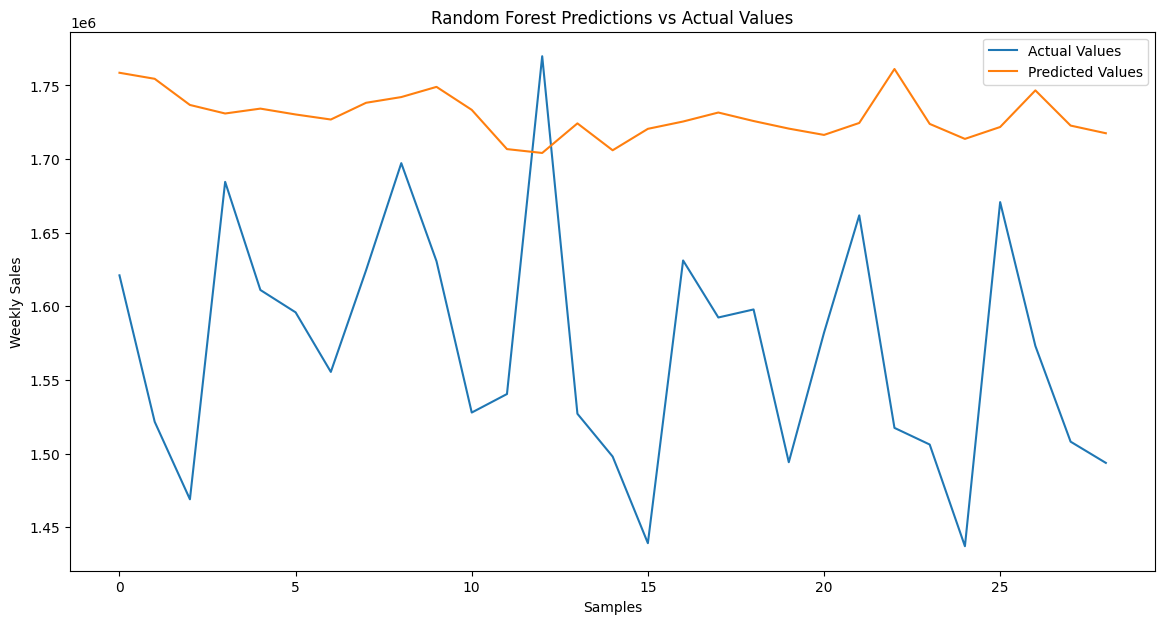

Random Forest RMSE: 176614.24703308326
Mean Squared Error: 31192592255.062958
R-squared: -3.914966348709413
Mean Absolute Error: 162125.98971379187


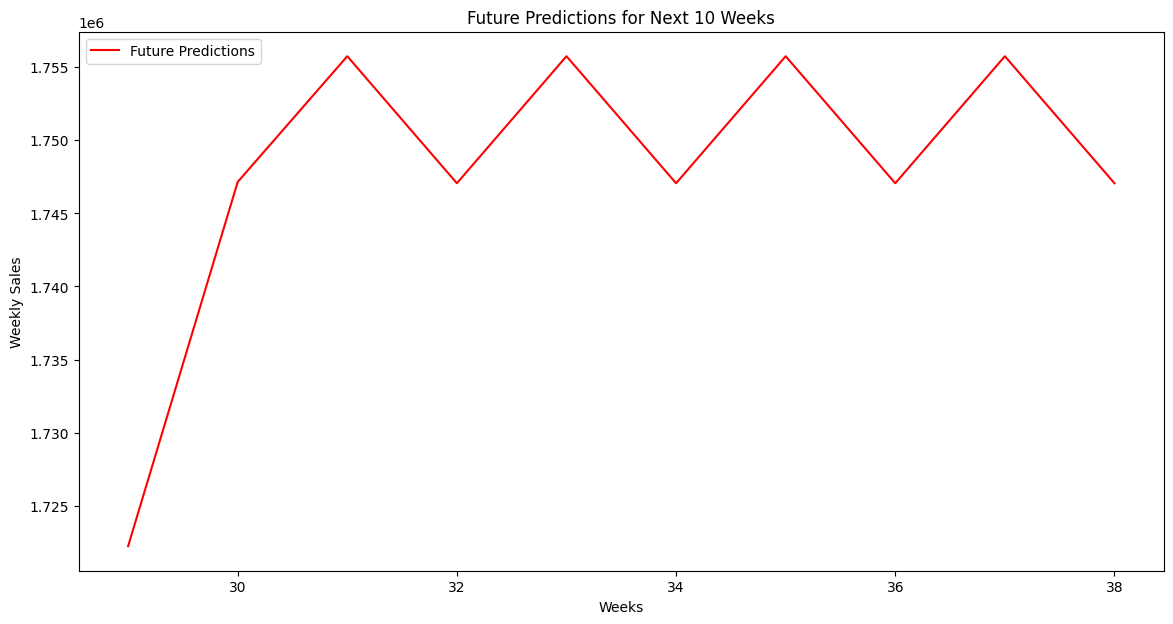

In [65]:
y_pred_rf = rf_model.predict(x_test)

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred_rf, label='Predicted Values')
plt.legend()
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.show()

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

future_weeks = 10
last_known_data = random_forest_df.iloc[-1].copy()
future_predictions = []

for i in range(future_weeks):
    next_week_data = last_known_data.copy()
    next_week_data['WeekOfYear'] = (next_week_data['WeekOfYear'] % 52) + 1
    next_week_data['Year'] = next_week_data['Year'] + (next_week_data['WeekOfYear'] == 1)
    next_week_data['Weekly_Sales_Lag1'] = last_known_data['Weekly_Sales']
    
    x_future = next_week_data[['CPI', 'Unemployment', 'Fuel_Price', 'WeekOfYear', 'Year', 'Weekly_Sales_Lag1']]
    x_future = x_future.to_frame().T  # Ensure X_future has valid feature names
    future_sales = rf_model.predict(x_future)[0]
    
    future_predictions.append(future_sales)
    last_known_data.loc['Weekly_Sales'] = future_sales 

plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test), len(y_test) + future_weeks), future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Future Predictions for Next 10 Weeks')
plt.xlabel('Weeks')
plt.ylabel('Weekly Sales')
plt.show()

#### Segundo modelo: ARIMA

Estatística ADF: -5.102186145192288
p-value: 1.3877788330759434e-05
A série é estacionária? -- Sim.


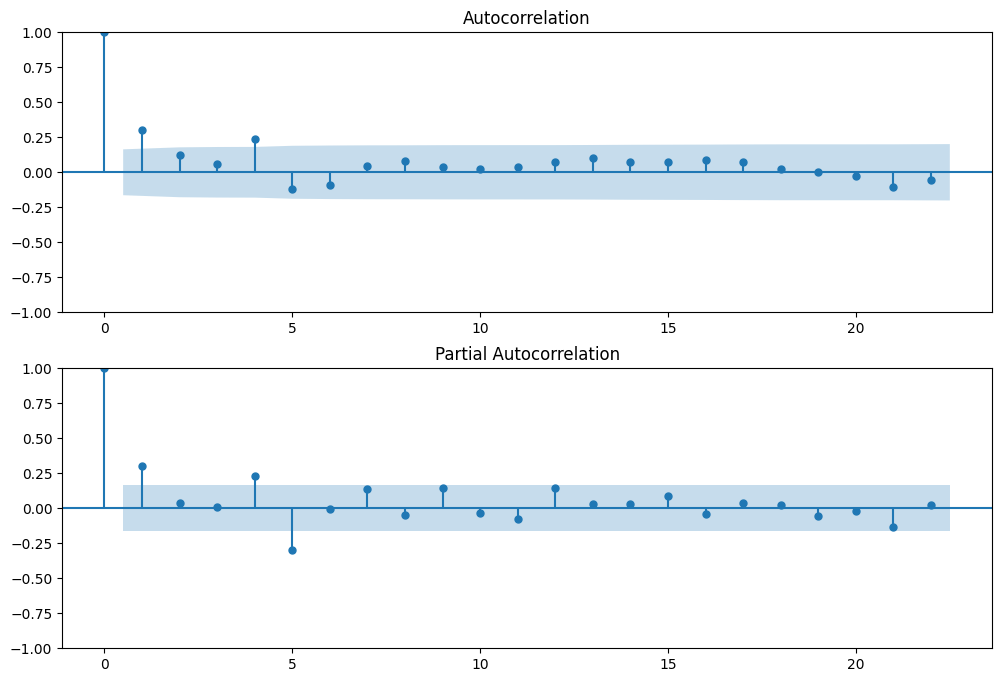

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df = df.reset_index()
df.set_index('Date', inplace=True)
df = df.asfreq('W-FRI')

y = df['Weekly_Sales']

adf_result = adfuller(y)
print(f'Estatística ADF: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

print(f'A série é estacionária? -- {"Sim." if adf_result[1] < 0.05 else "Não."}')

if adf_result[1] > 0.05:
    y_diff = y.diff().dropna()
    adf_result_diff = adfuller(y_diff)
    print(f'ADF Statistic (Differenced): {adf_result_diff[0]}')
    print(f'p-value (Differenced): {adf_result_diff[1]}')
else:
    y_diff = y

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(y_diff, ax=ax[0])
plot_pacf(y_diff, ax=ax[1])
plt.show()



In [67]:
y = df['Weekly_Sales']

train_size = int(len(df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

d = 0 # porque a série é estacionária desde o início
p = 5 # número de lags significativos no PACF
q = 4 # número de lags significativos no ACF

arima_model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(p, d, q, 52)).fit(disp=False)

arima_model.summary()

/home/lowe/Documents/fiap/final/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/lowe/Documents/fiap/final/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/lowe/Documents/fiap/final/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/lowe/Documents/fiap/final/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 52)   Log Likelihood               -1509.426
Date:                            Thu, 07 Nov 2024   AIC                           3056.851
Time:                                    17:33:19   BIC                           3108.839
Sample:                                02-05-2010   HQIC                          3077.950
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7407      2.223     -0.333      0.739      -5.098       3.616
ar.L2          0.5217      0.815      0.640      0.522      -1.076       2.119
ar.L3          0.8364      0.927      0.902      0.367      -0.981       2.654
ar.L4          0.4176      0.825      0.506      0.613      -1.199       2.034
ar.L5         -0.0363      0.575     -0.063      0.950      -1.163       1.090
ma.L1          1.1680      2.396      0.488      0.626      -3.528       5.864
ma.L2         -0.0369      1.079     -0.034      0.973      -2.152       2.078
ma.L3         -1.0163      1.038     -0.979      0.327      -3.051       1.018
ma.L4         -0.6635      1.447     -0.459      0.646      -3.499       2.172
ar.S.L52       0.2611   4045.079   6.45e-05      1.000   -7927.948    7928.470
ar.S.L104      0.0467   1767.156   2.64e-05      1.000   -3463.515    3463.608
ar.S.L156      0.0505   1993.430   2.53e-05      1.000   -3907.001    3907.102
ar.S.L208      0.0598    761.803   7.85e-05      1.000   -1493.047    1493.167
ar.S.L260     -0.0218    946.813   -2.3e-05      1.000   -1855.742    1855.699
ma.S.L52       0.3016   4044.031   7.46e-05      1.000   -7925.854    7926.457
ma.S.L104      0.1340   1437.284   9.33e-05      1.000   -2816.890    2817.158
ma.S.L156      0.0290    822.009   3.52e-05      1.000   -1611.079    1611.137
ma.S.L208     -0.0414   1256.184  -3.29e-05      1.000   -2462.116    2462.033
sigma2      2.554e+10      0.001   2.33e+13      0.000    2.55e+10    2.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               121.57
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                             1.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+29. Standard errors may be unstable.
"""

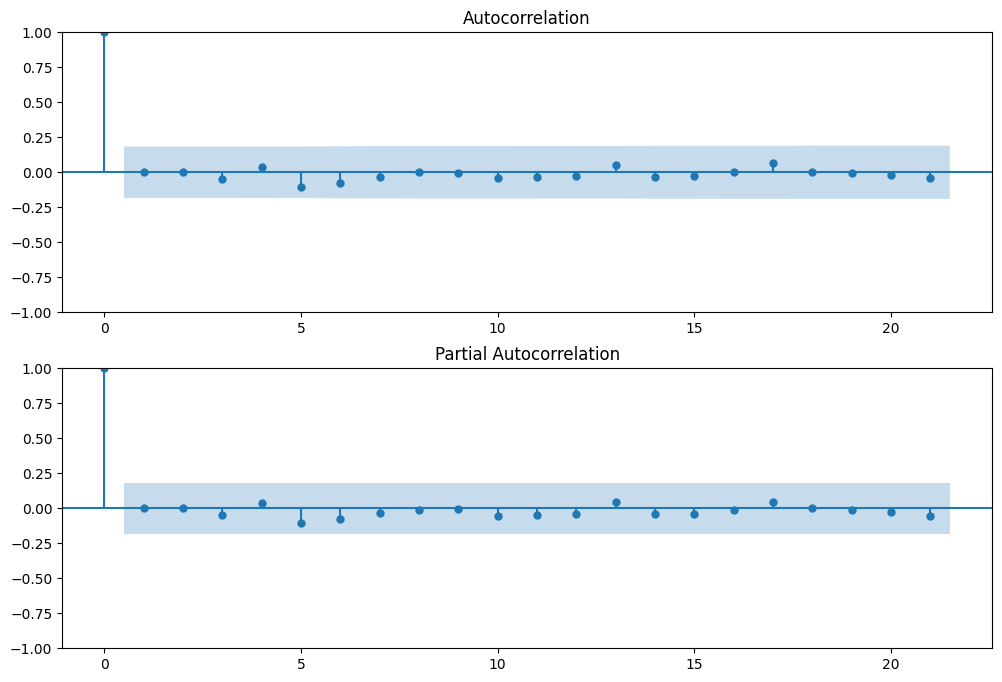

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(arima_model.resid, ax=ax[0])
plot_pacf(arima_model.resid, ax=ax[1])
plt.show()


In [69]:
forecast = arima_model.forecast(steps=len(y_test))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forecast)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 62955.875658003846
Mean Squared Error (MSE): 5189135262.491978
Root Mean Squared Error (RMSE): 72035.6527178867
R-squared: 0.18235634327859473


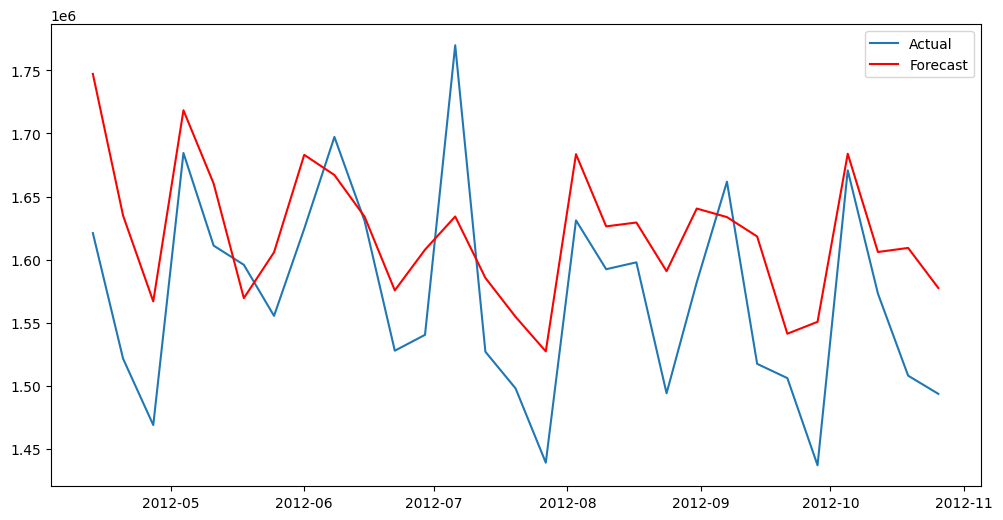

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

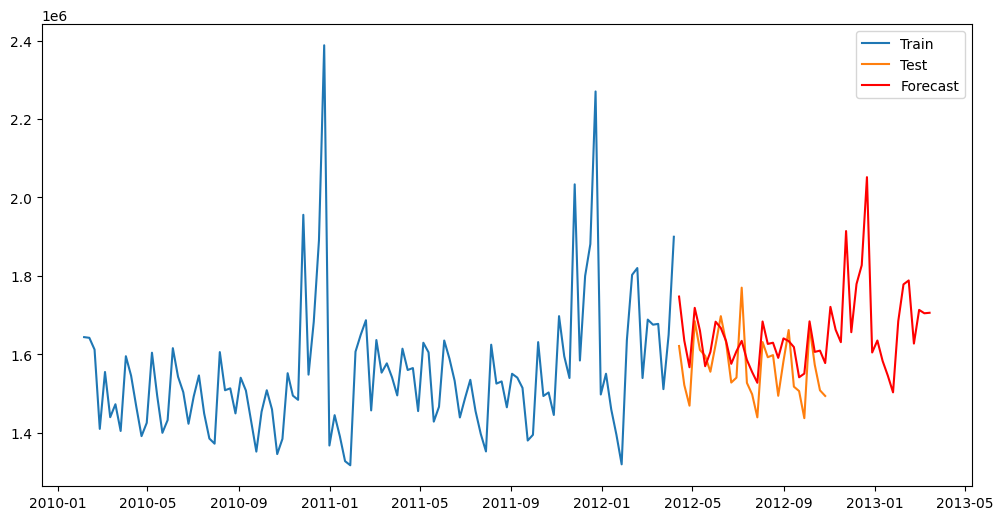

In [71]:
additional_steps = 20
total_steps = len(y_test) + additional_steps
extended_forecast = arima_model.forecast(steps=total_steps)

extended_forecast_df = extended_forecast.to_frame(name='Weekly_Sales_Forecast')
extended_forecast_df.index = pd.date_range(start=y_train.index[-1] + pd.Timedelta(weeks=1), periods=total_steps, freq='W-FRI')
extended_forecast_df.index.name = 'Date'

y_test_df = y_test.to_frame(name='Weekly_Sales_Test')
y_test_df.index = pd.date_range(start=y_train.index[-1] + pd.Timedelta(weeks=1), periods=len(y_test), freq='W-FRI')
y_test_df.index.name = 'Date'

y_train_df = y_train.to_frame(name='Weekly_Sales_Train')
y_train_df.index = pd.date_range(start=df.index[0], periods=len(y_train), freq='W-FRI')
y_train_df.index.name = 'Date'

combined_df = pd.concat([y_train_df, y_test_df, extended_forecast_df], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Weekly_Sales_Train'], label='Train')
plt.plot(combined_df.index, combined_df['Weekly_Sales_Test'], label='Test')
plt.plot(combined_df.index, combined_df['Weekly_Sales_Forecast'], label='Forecast', color='red')
plt.legend()
plt.show()


#### Aperfeiçoamento do Modelo com uma coluna exógena

In [72]:
x = df[['CPI']]

x_train, x_test = x[:train_size], x[train_size:]


exog_arima_model = SARIMAX(
    y_train, 
    order=(p, d, q), 
    seasonal_order=(p, d, q, 52),
    exog=x_train
    ).fit(disp=False)

exog_arima_model.summary()

/home/lowe/Documents/fiap/final/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 52)   Log Likelihood               -1499.836
Date:                            Thu, 07 Nov 2024   AIC                           3039.671
Time:                                    17:39:24   BIC                           3094.395
Sample:                                02-05-2010   HQIC                          3061.880
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPI         7235.3469    358.999     20.154      0.000    6531.722    7938.972
ar.L1         -0.2439      1.575     -0.155      0.877      -3.330       2.842
ar.L2         -0.5578      1.208     -0.462      0.644      -2.925       1.810
ar.L3         -0.1989      0.861     -0.231      0.817      -1.887       1.489
ar.L4         -0.1099      0.769     -0.143      0.886      -1.618       1.398
ar.L5         -0.0255      0.694     -0.037      0.971      -1.386       1.335
ma.L1          0.5844      1.545      0.378      0.705      -2.444       3.613
ma.L2          0.7870      1.585      0.497      0.619      -2.319       3.893
ma.L3          0.3906      1.339      0.292      0.771      -2.234       3.015
ma.L4          0.5314      0.780      0.681      0.496      -0.998       2.061
ar.S.L52       0.2684   1.05e+05   2.56e-06      1.000   -2.06e+05    2.06e+05
ar.S.L104      0.2914   1.19e+05   2.46e-06      1.000   -2.32e+05    2.32e+05
ar.S.L156     -0.0517   5.38e+04  -9.62e-07      1.000   -1.05e+05    1.05e+05
ar.S.L208      0.0135   5.38e+04   2.52e-07      1.000   -1.05e+05    1.05e+05
ar.S.L260     -0.0120   4.66e+04  -2.58e-07      1.000   -9.14e+04    9.14e+04
ma.S.L52       0.2970   1.05e+05   2.84e-06      1.000   -2.05e+05    2.05e+05
ma.S.L104     -0.1160   1.94e+05  -5.99e-07      1.000    -3.8e+05     3.8e+05
ma.S.L156     -0.0116   9.27e+04  -1.26e-07      1.000   -1.82e+05    1.82e+05
ma.S.L208     -0.0212   7.12e+04  -2.97e-07      1.000    -1.4e+05     1.4e+05
sigma2       2.26e+10      0.008   2.75e+12      0.000    2.26e+10    2.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               150.22
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             1.42
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+32. Standard errors may be unstable.
"""

In [73]:
from sklearn.linear_model import LinearRegression


dates = np.arange(len(x)).reshape(-1, 1)

model = LinearRegression()
model.fit(dates, x)

future_dates = np.arange(len(x), len(x) + 20).reshape(-1, 1)
future_predictions = model.predict(future_dates)

future_index = pd.to_datetime([
    '2012-11-02', '2012-11-09', '2012-11-16', '2012-11-23', '2012-11-30',
    '2012-12-07', '2012-12-14', '2012-12-21', '2012-12-28', '2013-01-04',
    '2013-01-11', '2013-01-18', '2013-01-25', '2013-02-01', '2013-02-08',
    '2013-02-15', '2013-02-22', '2013-03-01', '2013-03-08', '2013-03-15'
])

extended_x = pd.concat([x, pd.DataFrame(future_predictions, columns=['CPI'], index=future_index)])
extended_x.index.name = 'Dates'

extended_x.tail(10)


,CPI
Dates,
2013-01-11,224.39
2013-01-18,224.49
2013-01-25,224.59
2013-02-01,224.69
2013-02-08,224.79
2013-02-15,224.90
2013-02-22,225.00
2013-03-01,225.10
2013-03-08,225.20


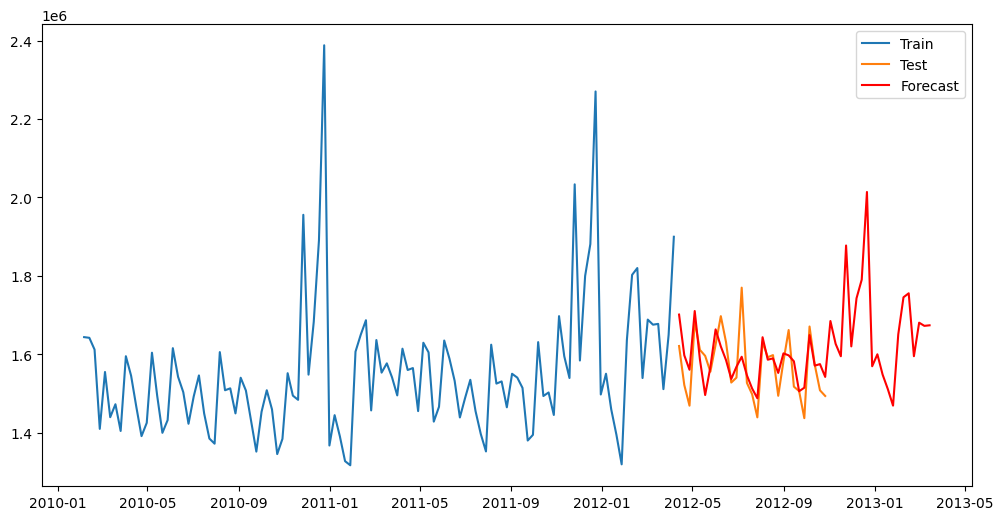

In [74]:
additional_steps = 20
total_steps = len(y_test) + additional_steps

exog_future = extended_x.tail(49)

extended_forecast = exog_arima_model.forecast(steps=total_steps, exog=exog_future)

extended_forecast_df = extended_forecast.to_frame(name='Weekly_Sales_Forecast')
extended_forecast_df.index = pd.date_range(start=y_train.index[-1] + pd.Timedelta(weeks=1), periods=total_steps, freq='W-FRI')
extended_forecast_df.index.name = 'Date'

y_test_df = y_test.to_frame(name='Weekly_Sales_Test')
y_test_df.index = pd.date_range(start=y_train.index[-1] + pd.Timedelta(weeks=1), periods=len(y_test), freq='W-FRI')
y_test_df.index.name = 'Date'

y_train_df = y_train.to_frame(name='Weekly_Sales_Train')
y_train_df.index = pd.date_range(start=df.index[0], periods=len(y_train), freq='W-FRI')
y_train_df.index.name = 'Date'

combined_df = pd.concat([y_train_df, y_test_df, extended_forecast_df], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Weekly_Sales_Train'], label='Train')
plt.plot(combined_df.index, combined_df['Weekly_Sales_Test'], label='Test')
plt.plot(combined_df.index, combined_df['Weekly_Sales_Forecast'], label='Forecast', color='red')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 45495.32142004887
Mean Squared Error (MSE): 3520636435.9307485
Root Mean Squared Error (RMSE): 59334.951217058806
R-squared (R2): 0.4452590067812898


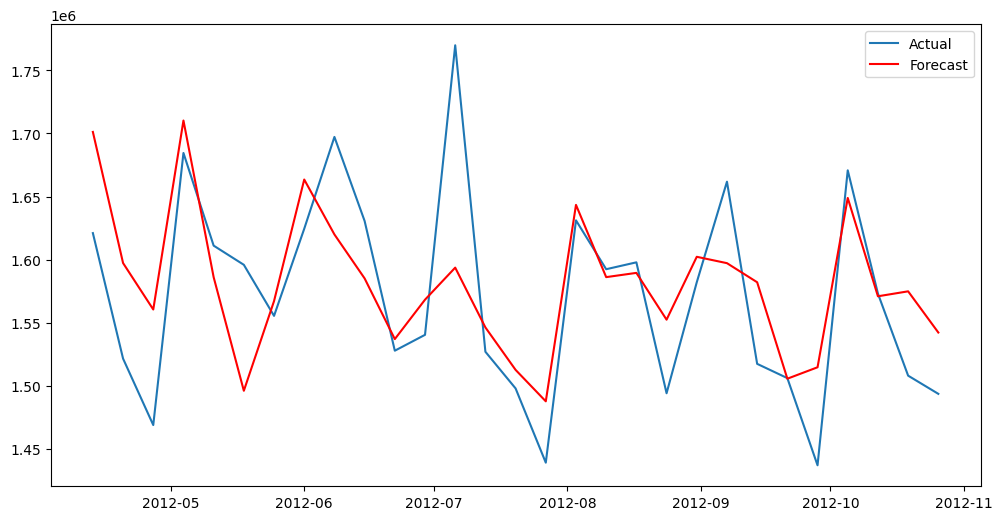

In [75]:
forecast = exog_arima_model.forecast(steps=len(y_test), exog=x_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forecast)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()